# 1.0. Imports

In [15]:
import numpy as np
import pymc3 as pm

from matplotlib import pyplot as plt

# 2.0. Dados

In [6]:
# Dados Xiomi
X_a = np.array( [1]* (int(0.83*201) + int(0.09*201)) + [0] * ( int(0.01*201) + int(0.03*201) ) )
np.random.shuffle( X_a )

# Dados Motorola
X_b = np.array( [1]* (int(0.78*301) + int(0.15*301)) + [0] * ( int(0.02*301) + int(0.03*301) ) )
np.random.shuffle( X_b )

# 3.0. Inferencia Bayesiana

In [29]:
with pm.Model() as model:
    # prior
    p_a = pm.Beta( 'p_a', 1, 1 )
    p_b = pm.Beta( 'p_b', 28, 0.5 )
    
    # Determinist
    delta = pm.Deterministic( 'delta', p_a - p_b )

    # posterior
    obs_a = pm.Bernoulli( 'obs_a', p_a, observed=X_a )
    obs_b = pm.Bernoulli( 'obs_b', p_b, observed=X_b )

    # likelihood
    trace = pm.sample( draws=2000, tune=1000, step=pm.Metropolis() )

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [p_b]
>Metropolis: [p_a]
Sampling 2 chains, 0 divergences: 100%|██████████| 6000/6000 [00:05<00:00, 1019.78draws/s]
The number of effective samples is smaller than 25% for some parameters.


# 4.0. Plot Posterior

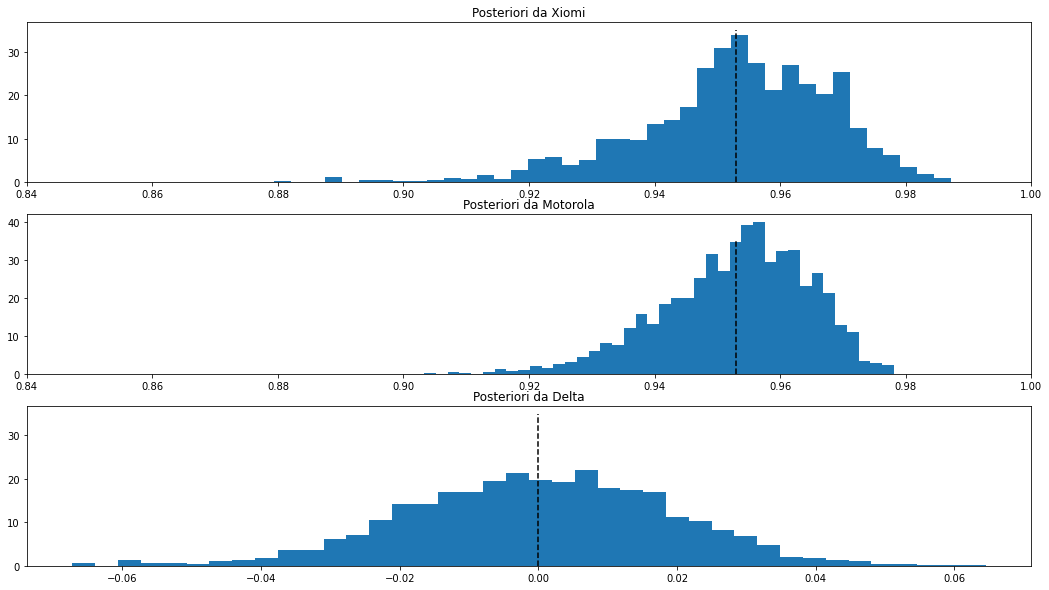

In [30]:
plt.figure( figsize=(18, 10))

plt.subplot( 311 )
plt.hist( trace['p_a'], histtype='stepfilled', bins=40, density=True );
plt.xlim( [0.84, 1.0] )
plt.vlines( trace['p_a'].mean(), 0, 35, linestyle='--' )
plt.title( 'Posteriori da Xiomi');

plt.subplot( 312 )
plt.hist( trace['p_b'], histtype='stepfilled', bins=40, density=True );
plt.xlim( [0.84, 1.0] )
plt.vlines( trace['p_b'].mean(), 0, 35, linestyle='--' )
plt.title( 'Posteriori da Motorola');

plt.subplot( 313 )
plt.hist( trace['delta'], histtype='stepfilled', bins=40, density=True );
plt.vlines( 0, 0, 35, linestyle='--' )
plt.title( 'Posteriori da Delta');

In [31]:
print( 'Probabilidade de VOCE gostar mais do Smartphone da Xiomi: {}'.format( np.mean( trace['delta'] > 0 ) ) )
print( 'Probabilidade de VOCE gostar mais do Smartphone da Motorola: {}'.format( np.mean( trace['delta'] < 0 ) ) )

Probabilidade de VOCE gostar mais do Smartphone da Xiomi: 0.504
Probabilidade de VOCE gostar mais do Smartphone da Motorola: 0.496
